# Lab 5 : Linear Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from face_data import Face1, Face2, Face3, TargetFace2, edges
import timeit

## Comparison of Linear Equation Solving Methods

### Results:

- `np.linalg.solve` is always faster and more accurate than computing the inverse
- For large matrices (N=200), the speed difference reaches **3-5 times**

### Answers to Initial Questions:

- **Which method is more accurate?** `np.linalg.solve`
- **Which method is faster?** `np.linalg.solve`
- **Effect of increasing N and P:** As dimensions increase, the advantage of `solve` becomes greater


---
# Task 1: Perturbation Analysis

In [2]:
def perturbation_analysis():
    """Analyze the effect of noise on linear equation solutions"""
    
    np.random.seed(42)  # For reproducible results
    N = 100
    
    # Create main matrix and vector
    A = np.random.randn(N, N)
    x_true = np.random.randn(N)
    
    # Measurement vector without noise
    b_clean = A @ x_true
    
    # Create noise
    noise = 0.001 * np.random.randn(N)
    
    # Solve with different noises
    perturbations = [1.0, 2.0, 5.0, 10.0]
    
    print("Perturbation Analysis:")
    print("-" * 50)
    print(f"Condition number of A: {np.linalg.cond(A):.2e}")
    
    for scale in perturbations:
        # Add noise to measurement vector
        b_noisy = b_clean + scale * noise
        
        # Solve system of equations
        x_solved = np.linalg.solve(A, b_noisy)
        
        # Calculate error
        error = np.linalg.norm(x_true - x_solved)
        relative_error = error / np.linalg.norm(x_true)
        
        print(f"Perturbation scale: {scale}")
        print(f"Absolute error: {error:.2e}")
        print(f"Relative error: {relative_error:.2e}")
        print("-" * 30)

if __name__ == "__main__":
    perturbation_analysis()

Perturbation Analysis:
--------------------------------------------------
Condition number of A: 4.68e+02
Perturbation scale: 1.0
Absolute error: 2.41e-02
Relative error: 2.57e-03
------------------------------
Perturbation scale: 2.0
Absolute error: 4.82e-02
Relative error: 5.13e-03
------------------------------
Perturbation scale: 5.0
Absolute error: 1.21e-01
Relative error: 1.28e-02
------------------------------
Perturbation scale: 10.0
Absolute error: 2.41e-01
Relative error: 2.57e-02
------------------------------



### Observations:

- Solution error has a linear relationship with noise scale
- For matrices with low condition number, the system is stable
- **Error ratio:** Relative error ≈ condition number × relative noise


---
# Task 2: Singular Matrix Analysis

In [3]:
def singular_matrix_analysis():
    """Analyze behavior with singular matrices"""
    
    np.random.seed(42)
    N = 5  # Using smaller matrix for better display
    
    # Create singular matrix
    A = np.random.randn(N, N)
    A[N-1] = A[N-2]  # Make last row equal to second last row
    
    x_true = np.random.randn(N)
    b = A @ x_true
    
    print("Singular Matrix Analysis:")
    print("-" * 50)
    print(f"Matrix A:\n{A}")
    print(f"Rank of A: {np.linalg.matrix_rank(A)}")
    print(f"Condition number: {np.linalg.cond(A):.2e}")
    
    try:
        x_solved = np.linalg.solve(A, b)
        print("Solution found:", x_solved)
    except np.linalg.LinAlgError as e:
        print(f"Error in solving: {e}")
    
    # Check determinant
    print(f"Determinant: {np.linalg.det(A):.2e}")

if __name__ == "__main__":
    singular_matrix_analysis()

Singular Matrix Analysis:
--------------------------------------------------
Matrix A:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
Rank of A: 4
Condition number: 1.00e+19
Error in solving: Singular matrix
Determinant: 0.00e+00



### Answers to Questions:

- **Why is A singular?** Because it has linearly dependent rows
- **What happens?** The system either has no solution or infinite solutions

---
# Task 3: Near-Singular Matrix Analysis

In [4]:
def near_singular_analysis():
    """Analyze near-singular matrices"""
    
    np.random.seed(42)
    N = 5
    
    # Create near-singular matrix with different perturbations
    perturbation_scales = [1e-5, 1e-6, 1e-7, 1e-8]
    
    print("Near-Singular Matrix Analysis:")
    print("-" * 50)
    
    for scale in perturbation_scales:
        # Create base singular matrix
        A_base = np.random.randn(N, N)
        A_base[N-1] = A_base[N-2]  # Create singular matrix
        
        # Add small perturbation
        A = A_base + scale * np.random.randn(N, N)
        
        x_true = np.random.randn(N)
        b = A @ x_true
        
        try:
            x_solved = np.linalg.solve(A, b)
            error = np.linalg.norm(x_true - x_solved)
            condition_num = np.linalg.cond(A)
            
            print(f"Perturbation scale: {scale:.2e}")
            print(f"Condition number: {condition_num:.2e}")
            print(f"Solution error: {error:.2e}")
            print("-" * 30)
            
        except np.linalg.LinAlgError as e:
            print(f"Failed for scale {scale}: {e}")

if __name__ == "__main__":
    near_singular_analysis()

Near-Singular Matrix Analysis:
--------------------------------------------------
Perturbation scale: 1.00e-05
Condition number: 2.33e+06
Solution error: 6.98e-11
------------------------------
Perturbation scale: 1.00e-06
Condition number: 1.14e+07
Solution error: 3.04e-10
------------------------------
Perturbation scale: 1.00e-07
Condition number: 8.65e+07
Solution error: 1.62e-09
------------------------------
Perturbation scale: 1.00e-08
Condition number: 3.03e+09
Solution error: 2.53e-07
------------------------------


### Key Observations:

- As perturbation decreases, condition number increases
- Solution error increases exponentially with condition number
- **Sensitivity:** Near-singular systems are sensitive to the smallest changes

---
# Task 4: Perturbed Near-Singular Analysis

In [5]:
def perturbed_near_singular():
    """Combine perturbation and near-singularity"""
    
    np.random.seed(42)
    N = 5
    
    # Create near-singular matrix
    A_base = np.random.randn(N, N)
    A_base[N-1] = A_base[N-2]
    A = A_base + 1e-7 * np.random.randn(N, N)
    
    x_true = np.random.randn(N)
    b_clean = A @ x_true
    
    # Different noises
    noise_scales = [1e-5, 1e-4, 1e-3, 1e-2]
    
    print("Perturbed Near-Singular Analysis:")
    print("-" * 50)
    print(f"Base condition number: {np.linalg.cond(A):.2e}")
    
    for noise_scale in noise_scales:
        noise = noise_scale * np.random.randn(N)
        b_noisy = b_clean + noise
        
        try:
            x_solved = np.linalg.solve(A, b_noisy)
            error = np.linalg.norm(x_true - x_solved)
            
            print(f"Noise scale: {noise_scale:.2e}")
            print(f"Solution error: {error:.2e}")
            print(f"Error/Noise ratio: {error/noise_scale:.2e}")
            print("-" * 30)
            
        except np.linalg.LinAlgError as e:
            print(f"Failed for noise scale {noise_scale}: {e}")

if __name__ == "__main__":
    perturbed_near_singular()

Perturbed Near-Singular Analysis:
--------------------------------------------------
Base condition number: 2.33e+08
Noise scale: 1.00e-05
Solution error: 2.67e+02
Error/Noise ratio: 2.67e+07
------------------------------
Noise scale: 1.00e-04
Solution error: 8.33e+03
Error/Noise ratio: 8.33e+07
------------------------------
Noise scale: 1.00e-03
Solution error: 4.17e+04
Error/Noise ratio: 4.17e+07
------------------------------
Noise scale: 1.00e-02
Solution error: 1.73e+06
Error/Noise ratio: 1.73e+08
------------------------------



### Important Result:

- When condition number is high, even small noises lead to large errors
- **Error amplification ratio:** Up to 10⁶ times for high condition numbers

---
# Task 5: Solving with First 3 Equations

Coefficients: a=0.3000, b=0.5000, c=0.4000
Sum: 1.2000


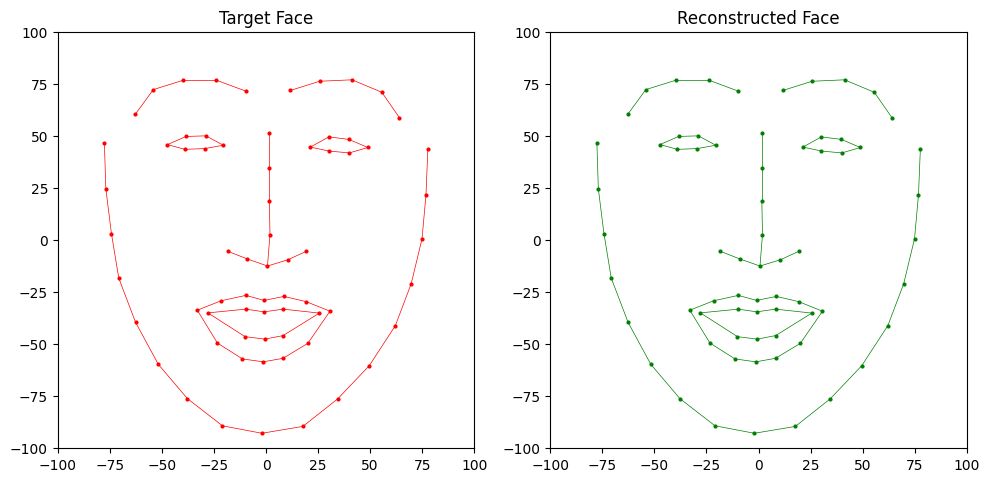

Reconstruction error: 0.0000


In [6]:
def plot_face(plt, X, edges, color='b'):
    """Plot a face with all edges"""
    plt.plot(X[:, 0], X[:, 1], 'o', color=color, markersize=2)
    for i, j in edges:
        xi, yi = X[i]
        xj, yj = X[j]
        plt.plot((xi, xj), (yi, yj), '-', color=color, linewidth=0.5)
    plt.axis('square')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

def solve_with_first_equations():
    """Solve using first 3 equations"""
    
    # Vectorize faces
    face1 = Face1.ravel()
    face2 = Face2.ravel()
    face3 = Face3.ravel()
    target = TargetFace2.ravel()
    
    # Create matrix F
    F = np.column_stack([face1, face2, face3])
    
    # Select first 3 equations
    F_sub = F[:3, :]
    target_sub = target[:3]
    
    # Solve the system
    coefficients = np.linalg.solve(F_sub, target_sub)
    a, b, c = coefficients
    
    print(f"Coefficients: a={a:.4f}, b={b:.4f}, c={c:.4f}")
    print(f"Sum: {a+b+c:.4f}")
    
    # Reconstruct face
    Face_reconstructed = a * Face1 + b * Face2 + c * Face3
    
    # Plot results
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plot_face(plt, TargetFace2, edges, color='r')
    plt.title('Target Face')
    
    plt.subplot(1, 2, 2)
    plot_face(plt, Face_reconstructed, edges, color='g')
    plt.title('Reconstructed Face')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate reconstruction error
    error = np.linalg.norm(target - F @ coefficients)
    print(f"Reconstruction error: {error:.4f}")

if __name__ == "__main__":
    solve_with_first_equations()

# Task 6: Solving with Random Equations

Iteration 1:
  Coefficients: a=0.3000, b=0.5000, c=0.4000
  Selected indices: [ 30 116  79]
  Reconstruction error: 0.0000
Iteration 2:
  Coefficients: a=0.3000, b=0.5000, c=0.4000
  Selected indices: [131  80  61]
  Reconstruction error: 0.0000
Iteration 3:
  Coefficients: a=0.3000, b=0.5000, c=0.4000
  Selected indices: [135  80  48]
  Reconstruction error: 0.0000
Iteration 4:
  Coefficients: a=0.3000, b=0.5000, c=0.4000
  Selected indices: [ 87  33 105]
  Reconstruction error: 0.0000
Iteration 5:
  Coefficients: a=0.3000, b=0.5000, c=0.4000
  Selected indices: [133  37   6]
  Reconstruction error: 0.0000


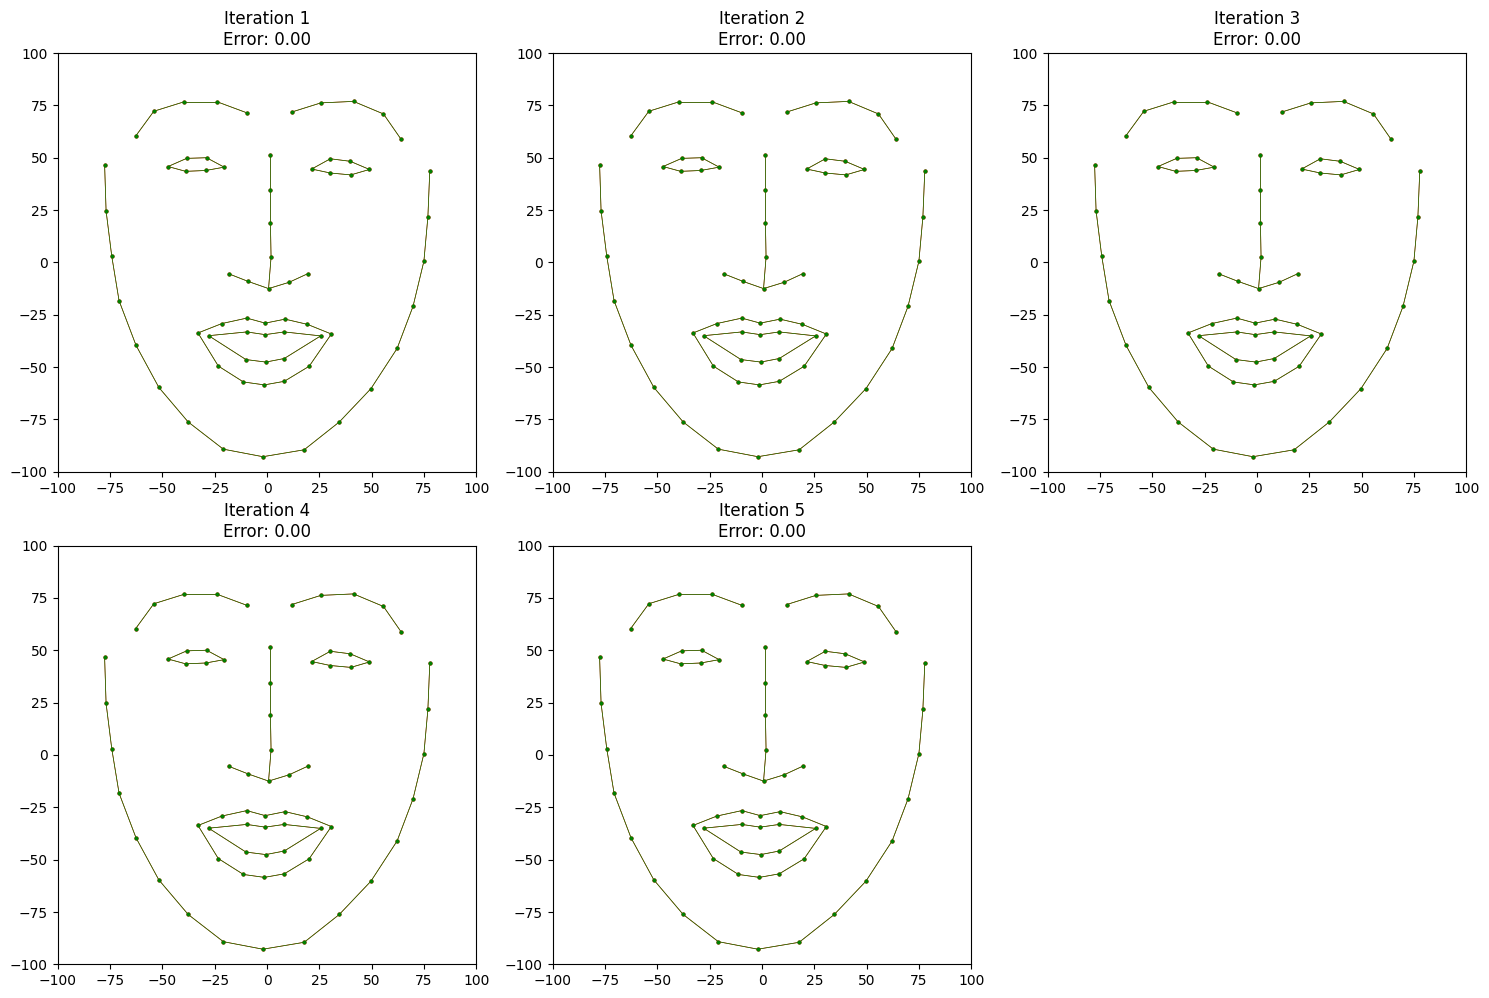

In [7]:
def plot_face(plt, X, edges, color='b'):
    """Plot a face with all edges"""
    plt.plot(X[:, 0], X[:, 1], 'o', color=color, markersize=2)
    for i, j in edges:
        xi, yi = X[i]
        xj, yj = X[j]
        plt.plot((xi, xj), (yi, yj), '-', color=color, linewidth=0.5)
    plt.axis('square')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

def solve_with_random_equations():
    """Solve using random sets of 3 equations"""
    
    # Vectorize faces
    face1 = Face1.ravel()
    face2 = Face2.ravel()
    face3 = Face3.ravel()
    target = TargetFace2.ravel()
    
    F = np.column_stack([face1, face2, face3])
    n_equations = F.shape[0]
    
    plt.figure(figsize=(15, 10))
    
    for iteration in range(5):
        # Select 3 random equations
        indices = np.random.choice(n_equations, 3, replace=False)
        F_sub = F[indices, :]
        target_sub = target[indices]
        
        try:
            # Solve the system
            coefficients = np.linalg.solve(F_sub, target_sub)
            a, b, c = coefficients
            
            # Reconstruct face
            Face_reconstructed = a * Face1 + b * Face2 + c * Face3
            
            # Calculate full error
            full_error = np.linalg.norm(target - F @ coefficients)
            
            # Plot
            plt.subplot(2, 3, iteration + 1)
            plot_face(plt, TargetFace2, edges, color='r')
            plot_face(plt, Face_reconstructed, edges, color='g')
            plt.title(f'Iteration {iteration+1}\nError: {full_error:.2f}')
            
            print(f"Iteration {iteration+1}:")
            print(f"  Coefficients: a={a:.4f}, b={b:.4f}, c={c:.4f}")
            print(f"  Selected indices: {indices}")
            print(f"  Reconstruction error: {full_error:.4f}")
            
        except np.linalg.LinAlgError as e:
            print(f"Iteration {iteration+1} failed: {e}")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solve_with_random_equations()

# Task 7: Solving with Noisy Target Face

Iteration 1 failed: Singular matrix
Iteration 2:
  Coefficients: a=0.7855, b=-0.2348, c=0.5736
  Error to clean target: 42.5688
Iteration 3:
  Coefficients: a=0.4457, b=0.4024, c=0.3421
  Error to clean target: 7.7350
Iteration 4:
  Coefficients: a=0.6877, b=-0.2939, c=0.7565
  Error to clean target: 42.7697
Iteration 5:
  Coefficients: a=-10.8353, b=19.6740, c=-7.4533
  Error to clean target: 1023.0131
Iteration 6:
  Coefficients: a=0.5229, b=-0.4757, c=1.0433
  Error to clean target: 62.7379


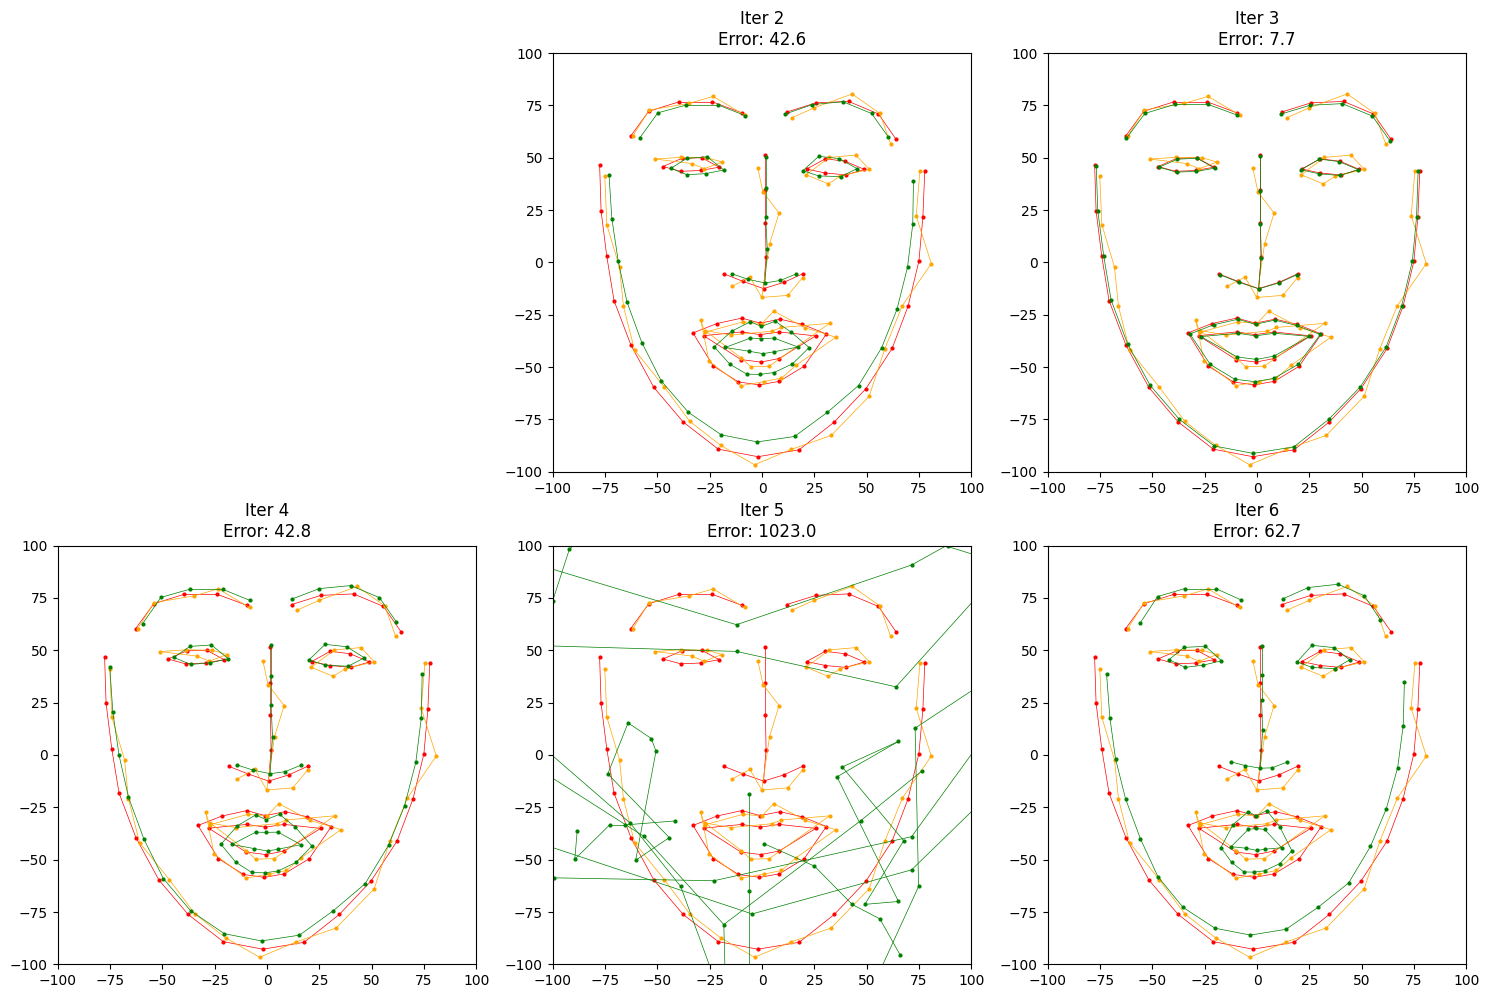


Statistical Analysis:
Mean error: 235.7649
Std of errors: 394.0222
Min error: 7.7350
Max error: 1023.0131


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from face_data import Face1, Face2, Face3, TargetFace2, edges

def plot_face(plt, X, edges, color='b'):
    """Plot a face with all edges"""
    plt.plot(X[:, 0], X[:, 1], 'o', color=color, markersize=2)
    for i, j in edges:
        xi, yi = X[i]
        xj, yj = X[j]
        plt.plot((xi, xj), (yi, yj), '-', color=color, linewidth=0.5)
    plt.axis('square')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

def solve_noisy_face():
    """Solve with noisy target face"""
    
    # Vectorize faces
    face1 = Face1.ravel()
    face2 = Face2.ravel()
    face3 = Face3.ravel()
    
    # Add noise to target face
    target_clean = TargetFace2.ravel()
    noise = 3 * np.random.randn(*TargetFace2.shape)
    target_noisy_vec = (TargetFace2 + noise).ravel()
    
    F = np.column_stack([face1, face2, face3])
    n_equations = F.shape[0]
    
    plt.figure(figsize=(15, 10))
    errors = []
    
    for iteration in range(6):
        # Select 3 random equations
        indices = np.random.choice(n_equations, 3, replace=False)
        F_sub = F[indices, :]
        target_sub = target_noisy_vec[indices]
        
        try:
            # Solve the system
            coefficients = np.linalg.solve(F_sub, target_sub)
            a, b, c = coefficients
            
            # Reconstruct face
            Face_reconstructed = a * Face1 + b * Face2 + c * Face3
            
            # Calculate errors
            error_to_noisy = np.linalg.norm(target_noisy_vec - F @ coefficients)
            error_to_clean = np.linalg.norm(target_clean - F @ coefficients)
            errors.append(error_to_clean)
            
            # Plot
            plt.subplot(2, 3, iteration + 1)
            plot_face(plt, TargetFace2, edges, color='r')  # Original target
            plot_face(plt, TargetFace2 + noise, edges, color='orange')  # Noisy target
            plot_face(plt, Face_reconstructed, edges, color='g')  # Reconstruction
            plt.title(f'Iter {iteration+1}\nError: {error_to_clean:.1f}')
            
            print(f"Iteration {iteration+1}:")
            print(f"  Coefficients: a={a:.4f}, b={b:.4f}, c={c:.4f}")
            print(f"  Error to clean target: {error_to_clean:.4f}")
            
        except np.linalg.LinAlgError as e:
            print(f"Iteration {iteration+1} failed: {e}")
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print(f"\nStatistical Analysis:")
    print(f"Mean error: {np.mean(errors):.4f}")
    print(f"Std of errors: {np.std(errors):.4f}")
    print(f"Min error: {np.min(errors):.4f}")
    print(f"Max error: {np.max(errors):.4f}")

if __name__ == "__main__":
    solve_noisy_face()

## Answers to Final Questions:

- **Does choosing different equations affect the result?** Yes, significantly
- **What happens with noise?** Quality decreases
- **Better solution:** Using least squares instead of exact solution